<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Ejercicio_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 97% 297M/306M [00:08<00:00, 41.2MB/s]
100% 306M/306M [00:08<00:00, 37.3MB/s]


In [ ]:
##Importamos librerías 
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.datasets import load_files       
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
import os
from google.colab.patches import cv2_imshow

In [ ]:
!unzip '/content/rockpaperscissors.zip'

In [ ]:
os.remove('/content/rps-cv-images/README_rpc-cv-images.txt')
os.listdir('/content/rps-cv-images')

['scissors', 'paper', 'rock']

In [ ]:
scissors_data=np.array(glob.glob("/content/rps-cv-images/scissors/*.png"))
paper_data=glob.glob("/content/rps-cv-images/paper/*.png")
rock_data=glob.glob("/content/rps-cv-images/rock/*.png")

In [ ]:
#Creación de array con todsas las rutas
images=np.concatenate([scissors_data,paper_data,rock_data],axis=None)

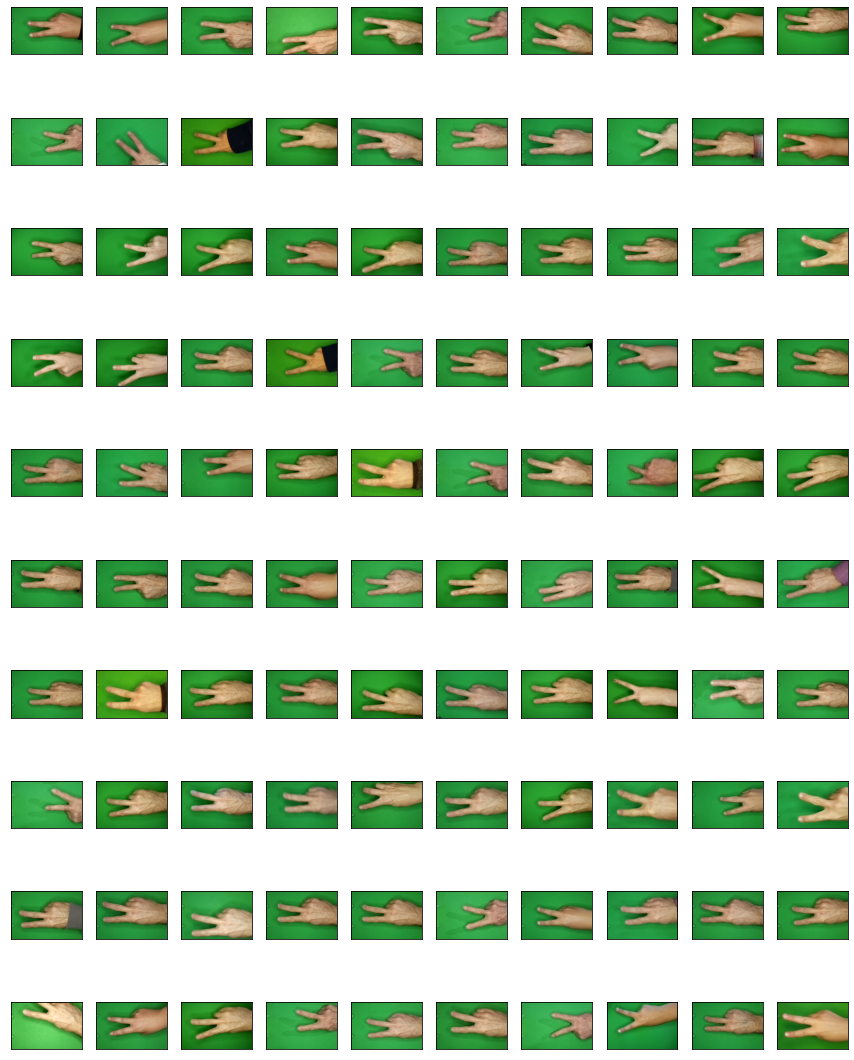

In [ ]:
plt.figure(figsize=(15,20))
for i in range(100):
    img=plt.imread(images[i])
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    
plt.show()

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)

In [ ]:
batch_size=64
train_it = datagen.flow_from_directory('/content/rps-cv-images', class_mode='binary', batch_size=batch_size, target_size=(64, 64),subset='training')
test_it = datagen.flow_from_directory('/content/rps-cv-images', class_mode='binary', batch_size=batch_size, target_size=(64, 64),subset='validation',shuffle=False)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


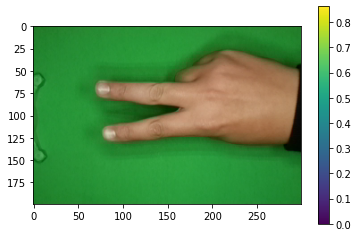

In [ ]:
img = plt.imread(scissors_data[0])
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [ ]:
img.shape

(200, 300, 3)

# Entrenamiento de red

In [237]:
classifier = Sequential()
classifier.add(Conv2D(60, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(60, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(60, (3, 3), activation = 'relu'))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

In [238]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs=15
history = classifier.fit(train_it,epochs = epochs,validation_data = test_it)

Epoch 1/15
28/28 [==============================] - 6s 207ms/step - loss: 0.8461 - accuracy: 0.6493 - val_loss: 0.5803 - val_accuracy: 0.7826
Epoch 2/15
28/28 [==============================] - 5s 173ms/step - loss: 0.3567 - accuracy: 0.8772 - val_loss: 0.2019 - val_accuracy: 0.9314
Epoch 3/15
28/28 [==============================] - 5s 168ms/step - loss: 0.1631 - accuracy: 0.9435 - val_loss: 0.1378 - val_accuracy: 0.9497
Epoch 4/15
28/28 [==============================] - 5s 171ms/step - loss: 0.1018 - accuracy: 0.9640 - val_loss: 0.0870 - val_accuracy: 0.9703
Epoch 5/15
28/28 [==============================] - 5s 172ms/step - loss: 0.0628 - accuracy: 0.9800 - val_loss: 0.0640 - val_accuracy: 0.9771
Epoch 6/15
28/28 [==============================] - 5s 173ms/step - loss: 0.0565 - accuracy: 0.9806 - val_loss: 0.1296 - val_accuracy: 0.9497
Epoch 7/15
28/28 [==============================] - 5s 170ms/step - loss: 0.0675 - accuracy: 0.9800 - val_loss: 0.0450 - val_accuracy: 0.9794
Epoch 

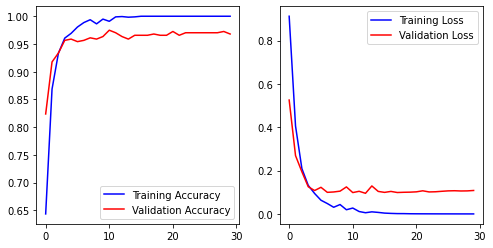

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions=classifier.predict(test_it)
predictions

array([[1.0000000e+00, 1.2636864e-12, 2.4933028e-08],
       [9.9999416e-01, 5.1616819e-14, 5.7858410e-06],
       [9.9939978e-01, 6.0018786e-04, 3.2971421e-12],
       ...,
       [1.0904844e-06, 7.2152053e-09, 9.9999893e-01],
       [8.6944526e-01, 1.3350588e-07, 1.3055460e-01],
       [5.6996879e-07, 1.1296062e-12, 9.9999940e-01]], dtype=float32)

In [ ]:
class_names=['paper', 'rock', 'scissors']

In [ ]:
predictions_label=[]
for i in range(len(predictions)):
  predictions_label.append(class_names[np.argmax(predictions[i])])

In [ ]:
predictions_label

In [ ]:
train_it.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
predictions_label_def=[]
for i in range(len(predictions_label)):
  if predictions_label[i] =='paper':
    predictions_label_def.append(0)
  elif predictions_label[i] =='rock':
    predictions_label_def.append(1)
  elif predictions_label[i] =='scissors':
    predictions_label_def.append(2)

In [ ]:
labels_test=test_it.labels
labels_test

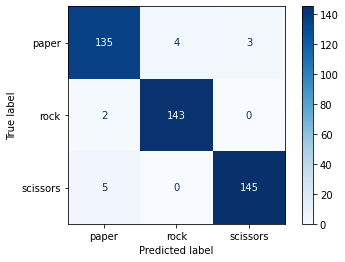

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label_def)
cm
train_it.class_indices
classes=list(train_it.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions_label_def, target_names=classes))

              precision    recall  f1-score   support

       paper       0.95      0.95      0.95       142
        rock       0.97      0.99      0.98       145
    scissors       0.98      0.97      0.97       150

    accuracy                           0.97       437
   macro avg       0.97      0.97      0.97       437
weighted avg       0.97      0.97      0.97       437



In [ ]:
path='/content/papel.jpeg'
img=cv2.imread(path)
img.shape

(1200, 1600, 3)

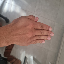

In [ ]:

imgR=cv2.resize(img,(64,64)) ## Para achicar la imagen un poco
cv2_imshow(imgR)
##cv2_imshow(imgR)

In [ ]:
imgR=(np.expand_dims(imgR,0))

imgR.shape

(1, 64, 64, 3)

In [ ]:
prediction_s=classifier.predict(imgR)
prediction_s

array([[1., 0., 0.]], dtype=float32)

In [ ]:
class_names[np.argmax(prediction_s)]

'paper'

In [ ]:
path='/content/papel.jpeg'

imgOrig=cv2.imread(path)

imgOrig.shape

(1200, 1600, 3)

In [ ]:
import tensorflow.keras.backend as K
def gradientModelDL (model,img,name_layer,imgOrig,scale_percent=100):
  with tf.GradientTape() as tape:
    last_conv_layer=model.get_layer(name_layer)
    iterate=tf.keras.models.Model([model.inputs],[model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(img)
    n=last_conv_layer.shape[1]
    class_out=model_out[:, np.argmax(model_out[0])]
    grads=tape.gradient(class_out, last_conv_layer)
    pooled_grads=K.mean(grads,axis=(0,1,2))
  #Disminuir la imagen
  width = int(imgOrig.shape[1] * scale_percent / 100)
  height = int(imgOrig.shape[0] * scale_percent / 100)
  dim = (width, height)
  img_resized = cv2.resize(imgOrig, dim, interpolation = cv2.INTER_AREA)
  heatmap=tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer),axis=-1)
  heatmap=np.maximum(heatmap, 0)
  heatmap/=np.max(heatmap)
  heatmap=heatmap.reshape((n,n))
  INTENSITY = 0.5
  heatmap = cv2.resize(heatmap, (img_resized.shape[1],img_resized.shape[0]))
  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
  imgHM = heatmap * INTENSITY + img_resized
  return img_resized,imgHM

In [ ]:
img_resized,imgHM=gradientModelDL(classifier,imgR,'conv2d_22',imgOrig)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


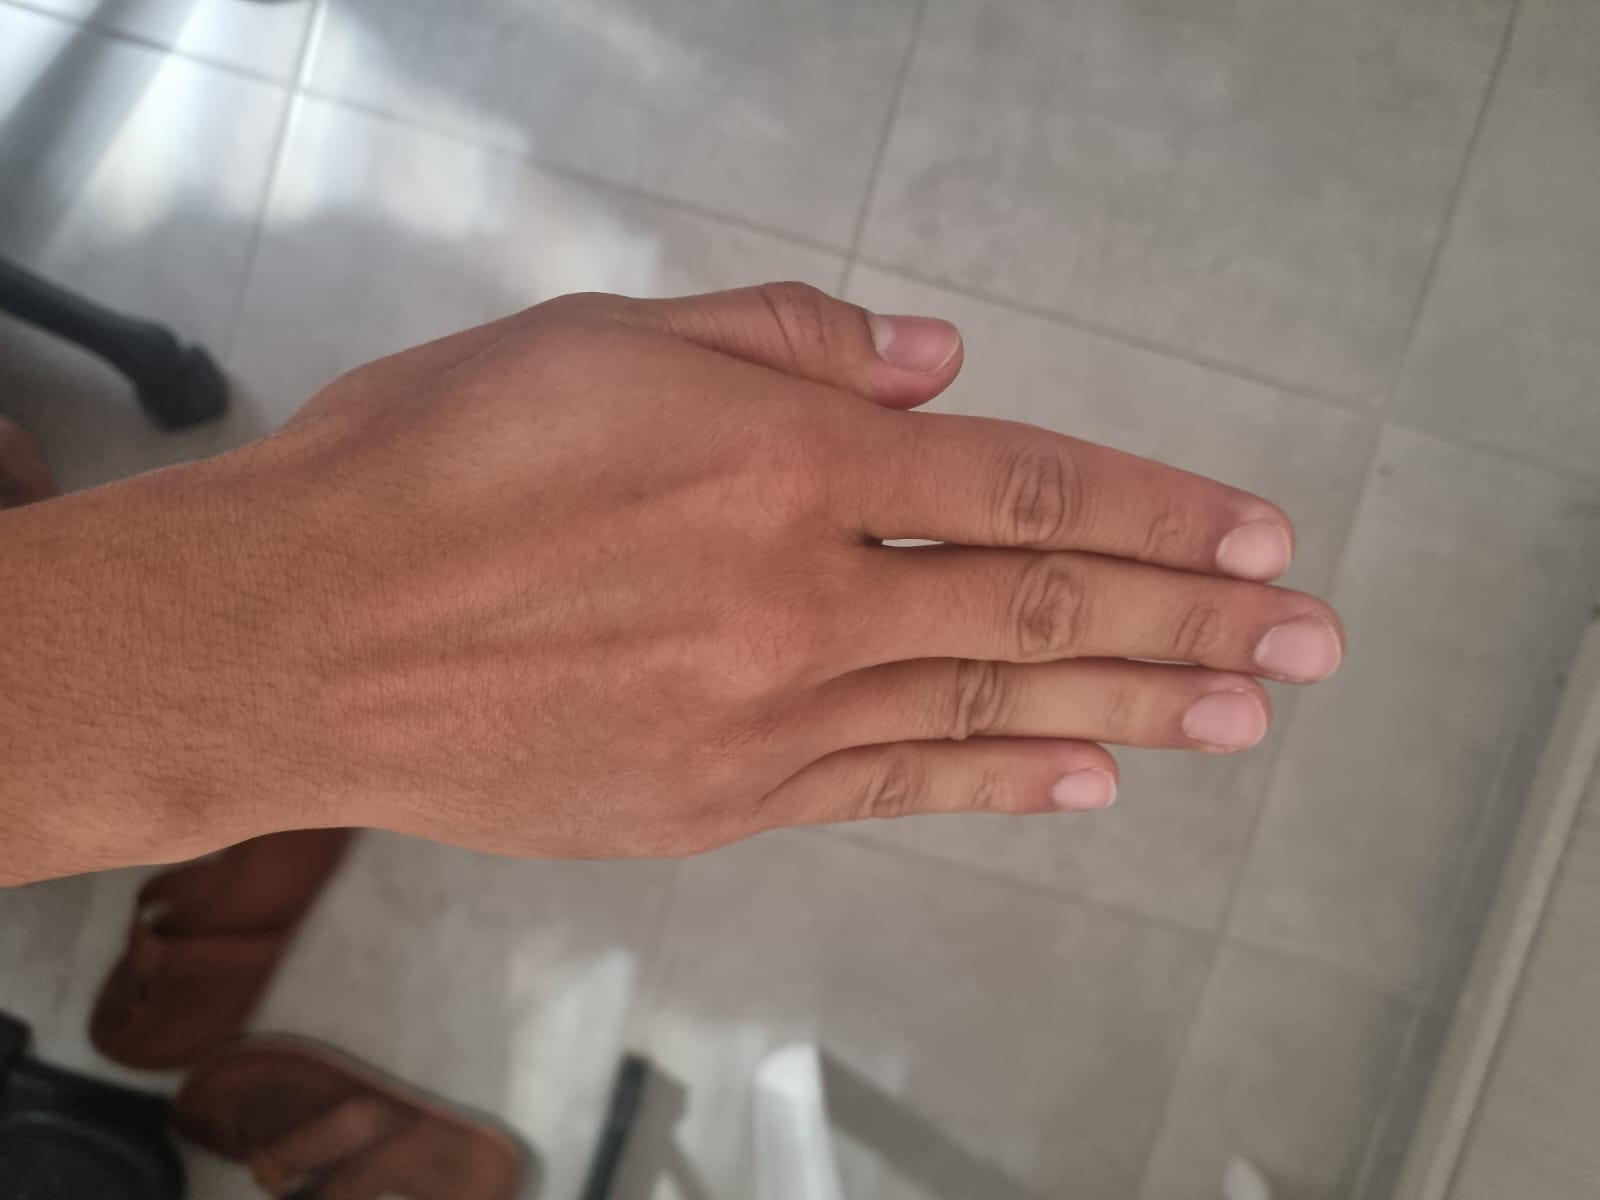

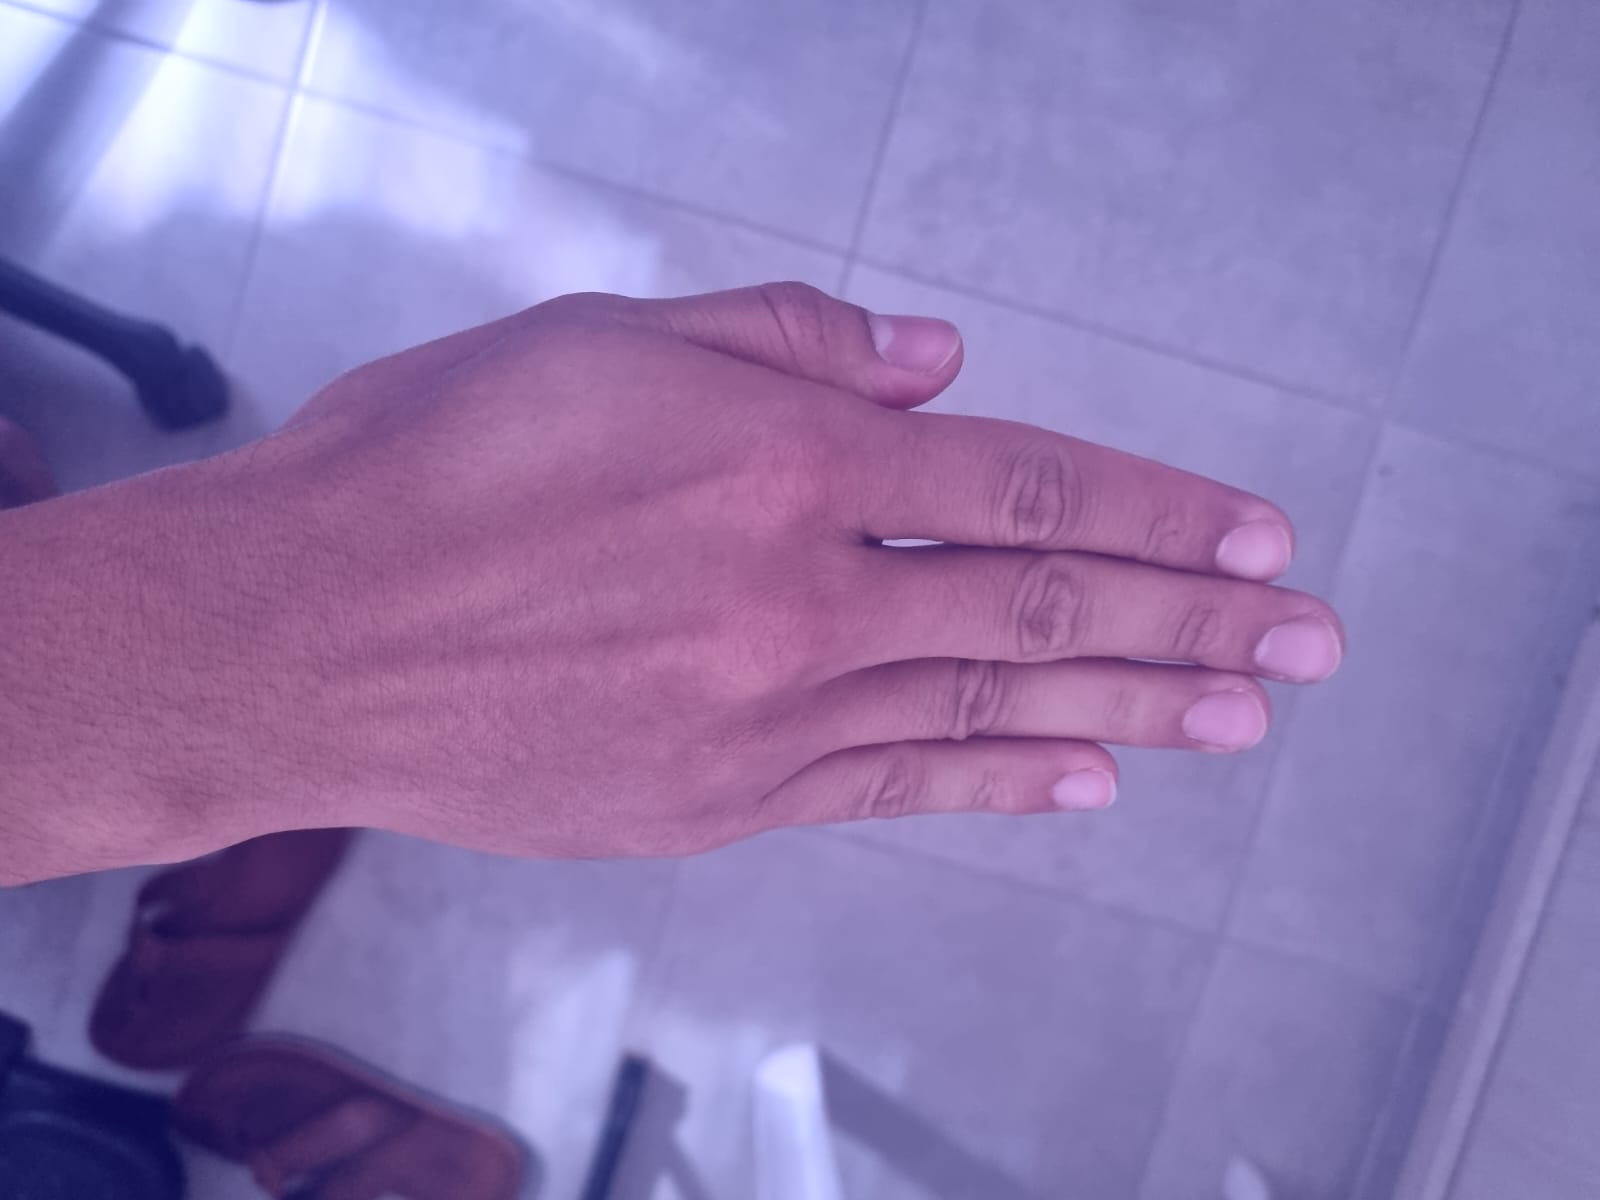

In [ ]:
cv2_imshow(img_resized)
cv2_imshow(imgHM)

# Demostración con dropout

In [ ]:
#Se verifica con un dropout
classifier_2 = Sequential()
classifier_2.add(Conv2D(60, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))

classifier_2.add(Conv2D(60, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
classifier_2.add(Conv2D(60, (3, 3), activation = 'relu'))

classifier_2.add(Flatten())

classifier_2.add(Dense(units = 128, activation = 'relu'))
classifier_2.add(Dropout(0.2))
classifier_2.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
classifier_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs=20
history_2 = classifier_2.fit(train_it,epochs = epochs,validation_data = test_it)

Epoch 1/20
28/28 [==============================] - 6s 200ms/step - loss: 0.8322 - accuracy: 0.6419 - val_loss: 0.4995 - val_accuracy: 0.8330
Epoch 2/20
28/28 [==============================] - 5s 170ms/step - loss: 0.3672 - accuracy: 0.8761 - val_loss: 0.2178 - val_accuracy: 0.9336
Epoch 3/20
28/28 [==============================] - 5s 175ms/step - loss: 0.2037 - accuracy: 0.9315 - val_loss: 0.1345 - val_accuracy: 0.9634
Epoch 4/20
28/28 [==============================] - 5s 174ms/step - loss: 0.1156 - accuracy: 0.9692 - val_loss: 0.0770 - val_accuracy: 0.9771
Epoch 5/20
28/28 [==============================] - 5s 172ms/step - loss: 0.0818 - accuracy: 0.9754 - val_loss: 0.0823 - val_accuracy: 0.9725
Epoch 6/20
28/28 [==============================] - 5s 171ms/step - loss: 0.0571 - accuracy: 0.9823 - val_loss: 0.0504 - val_accuracy: 0.9771
Epoch 7/20
28/28 [==============================] - 5s 170ms/step - loss: 0.0554 - accuracy: 0.9846 - val_loss: 0.0600 - val_accuracy: 0.9748
Epoch 

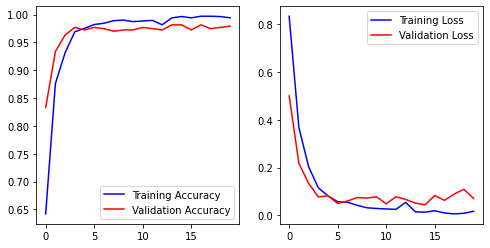

In [ ]:
acc=history_2.history['accuracy']
val_acc=history_2.history['val_accuracy']
epoch=range(len(acc))
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()